In [565]:
# Imports

# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline

import requests
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
from PIL import Image
from io import BytesIO
#import Tkinter, tkFileDialog
from nltk.tokenize import word_tokenize
import os
import sys
from PIL import Image, ImageDraw
import numpy as np
import math
import PIL.ImageFont as ImageFont
import textwrap
from textblob import TextBlob

In [588]:
MAX_FROM_ONE_TOPIC = 3
DEBUG = 1
MAX_QUOTE_LEN = 70
ORANGE1 = (214,90,49)
DARK = (0, 0, 0)
LIGHT = (255, 255, 255)


def FilePicker():
    root = Tkinter.Tk()
    root.withdraw()
    image_path = tkFileDialog.askopenfilename()
    return image_path

def GetCaption(image_path):
    #return "man and woman running on a beach"
    subscription_key = "562b4aae17574c63b7c2896b0e9836a4"
    assert subscription_key

    vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

    analyze_url = vision_base_url + "analyze"

    # image_path = "C:/Neeraj_Personal/TakeAway/Projects/beach.jpg"

    image_data = open(image_path, "rb").read()
    headers    = {'Ocp-Apim-Subscription-Key': subscription_key,
                  'Content-Type': 'application/octet-stream'}
    params     = {'visualFeatures': 'Categories,Description,Color'}
    response = requests.post(
        analyze_url, headers=headers, params=params, data=image_data)
    response.raise_for_status()

    # The 'analysis' object contains various fields that describe the image. The most
    # relevant caption for the image is obtained from the 'description' property.
    analysis = response.json()
#     print(analysis)
    image_caption = analysis["description"]["captions"][0]["text"].capitalize()

    # # Display the image and overlay it with the caption.
    image = Image.open(BytesIO(image_data))
#     plt.imshow(image)
#     plt.axis("off")
#     _ = plt.title(image_caption, size="x-large", y=-0.1)
    print("Image Caption: ", image_caption)
    return image_caption

def RemoveStopWords(tokenized_words):
    stop_words = stopwords.words('english')
    return [word for word in tokenized_words if word not in stop_words]

def GetAllQuotes(image_path):
    sentence = GetCaption(image_path)
    sentence = sentence.lower()
    words = RemoveStopWords(word_tokenize(sentence))
    quotes = []
    for word in words:
        quotes = quotes + (GetQuotesByKeyword(str(word)))
    return quotes

def DisplayImageWithQuote(image_path, quote):
    image_data = open(image_path, "rb").read()
    image = Image.open(BytesIO(image_data))
    plt.imshow(image)
    plt.axis("off")
    _ = plt.title(quote, size="x-large", y=-0.1)

def DisplayImageWithOverlay(image_path, quote):
    MAX_DISPLAY_WIDTH = 800

    np.set_printoptions(precision = 2)

    def getLeftPos(im):
        width, height = im.size
        return 0.1*width
    def getBottomPos(im):
        width, height = im.size
        return height - 0.3*height
    
    ptlarge = Image.open(image_path).convert("RGB")
    ptdraw = ImageDraw.Draw(ptlarge)

    leftpos = getLeftPos(ptlarge)
    bottompos = getBottomPos(ptlarge)
 
    lines = textwrap.wrap(quote, width=40)  #Max 40 characters in a line
    y_text = bottompos
    W, H = ptlarge.size
    font_size = max(20, int(W/20)) #Set font size as per the width of the image
    W_RATIO = MAX_DISPLAY_WIDTH/W
    MAX_DISPLAY_HEIGHT = int(H*W_RATIO)
    
    font = ImageFont.truetype("./caveat/caveat-bold.ttf", font_size)
    
    for line in lines:
        width, height = font.getsize(line)
        #ptdraw.text(((W - width) / 2-1, y_text-1), line, font=font, fill = DARK)
        #ptdraw.text(((W - width) / 2+1, y_text+1), line, font=font, fill = DARK)
        ptdraw.text(((W - width) / 2, y_text), line, font=font, fill = ORANGE1)
        y_text += height
    

    ptlarge = ptlarge.resize((MAX_DISPLAY_WIDTH, MAX_DISPLAY_HEIGHT), Image.ANTIALIAS)
    display(ptlarge)
    ptlarge.save("pictures/PictureWithQuote.jpg")

In [589]:
#Return sentiment of the quote
def isPositive(sentence):
    analysis = TextBlob(sentence)
    if(analysis.sentiment.polarity>0):
        return True
    else:
        return False

In [590]:
def GetQuotesByKeyword(keyword):
    answer = []
    url = "https://www.brainyquote.com/topics/" + keyword

    payload = ""
    headers = {
        'cache-control': "no-cache",
        'Postman-Token': "5b19b971-0950-44d1-bac6-50a068def9d3"
        }

    response = requests.request("GET", url, data=payload, headers=headers)

    if(response.status_code == 404):        
        result =  ["\nInfuse your life with action. Don't wait for it to happen. Make it happen. Make your own future. Make your own hope. Make your own love. And whatever your beliefs, honor your creator, not by passively waiting for grace to come down from upon high, but by doing what you can to make grace happen... yourself, right now, right down here on Earth.\n\nBradley Whitford\n\n", '\nLife is 10% what happens to you and 90% how you react to it.\n\nCharles R. Swindoll\n\n', '\nBeginning today, treat everyone you meet as if they were going to be dead by midnight. Extend to them all the care, kindness and understanding you can muster, and do it with no thought of any reward. Your life will never be the same again.\n\nOg Mandino\n\n', "\nLearn to enjoy every minute of your life. Be happy now. Don't wait for something outside of yourself to make you happy in the future. Think how really precious is the time you have to spend, whether it's at work or with your family. Every minute should be enjoyed and savored.\n\nEarl Nightingale\n\n", '\nNo matter what has happened to you in the past or what is going on in your life right now, it has no power to keep you from having an amazingly good future if you will walk by faith in God. God loves you! He wants you to live with victory over sin so you can possess His promises for your life today!\n\nJoyce Meyer\n\n', '\nOnly I can change my life. No one can do it for me.\n\nCarol Burnett\n\n', '\nSecurity is mostly a superstition. It does not exist in nature, nor do the children of men as a whole experience it. Avoiding danger is no safer in the long run than outright exposure. Life is either a daring adventure, or nothing.\n\nHelen Keller\n\n', "\nChoosing to be positive and having a grateful attitude is going to determine how you're going to live your life.\n\nJoel Osteen\n\n", '\nToday I choose life. Every morning when I wake up I can choose joy, happiness, negativity, pain... To feel the freedom that comes from being able to continue to make mistakes and choices - today I choose to feel life, not to deny my humanity but embrace it.\n\nKevyn Aucoin\n\n', '\nI have seen many storms in my life. Most storms have caught me by surprise, so I had to learn very quickly to look further and understand that I am not capable of controlling the weather, to exercise the art of patience and to respect the fury of nature.\n\nPaulo Coelho\n\n', "\nYour work is going to fill a large part of your life, and the only way to be truly satisfied is to do what you believe is great work. And the only way to do great work is to love what you do. If you haven't found it yet, keep looking. Don't settle. As with all matters of the heart, you'll know when you find it.\n\nSteve Jobs\n\n", '\nPeace is the beauty of life. It is sunshine. It is the smile of a child, the love of a mother, the joy of a father, the togetherness of a family. It is the advancement of man, the victory of a just cause, the triumph of truth.\n\nMenachem Begin\n\n', "\nChange your life today. Don't gamble on the future, act now, without delay.\n\nSimone de Beauvoir\n\n", "\nI cannot even imagine where I would be today were it not for that handful of friends who have given me a heart full of joy. Let's face it, friends make life a lot more fun.\n\nCharles R. Swindoll\n\n", "\nI believe that a trusting attitude and a patient attitude go hand in hand. You see, when you let go and learn to trust God, it releases joy in your life. And when you trust God, you're able to be more patient. Patience is not just about waiting for something... it's about how you wait, or your attitude while waiting.\n\nJoyce Meyer\n\n", '\nMy mission in life is not merely to survive, but to thrive; and to do so with some passion, some compassion, some humor, and some style.\n\nMaya Angelou\n\n', '\nLife is a blur when one is essaying different roles; it is so fulfilling.\n\nAmitabh Bachchan\n\n', '\nFinancial independence is paramount. My mom always says that when a woman is financially independent, she has the ability to live life on her own terms. I think that was the soundest advice that I ever got. No matter where you go in life or who you get married to, you have to be financially independent - whether you use it or not.\n\nPriyanka Chopra\n\n', "\nI do have a close circle of friends and I am very fortunate to have them as friends. I feel very close to them I think friends are everything in life after your family. You come across lots of people all the time but you only make very few friends and you have to be true to them otherwise what's the point in life?\n\nShah Rukh Khan\n\n", '\nStay true to yourself, yet always be open to learn. Work hard, and never give up on your dreams, even when nobody else believes they can come true but you. These are not cliches but real tools you need no matter what you do in life to stay focused on your path.\n\nPhillip Sweet\n\n', '\nNever stop fighting until you arrive at your destined place - that is, the unique you. Have an aim in life, continuously acquire knowledge, work hard, and have perseverance to realise the great life.\n\nA. P. J. Abdul Kalam\n\n', '\nLife consists not in holding good cards but in playing those you hold well.\n\nJosh Billings\n\n', '\nClouds come floating into my life, no longer to carry rain or usher storm, but to add color to my sunset sky.\n\nRabindranath Tagore\n\n', "\nYou can never control who you fall in love with, even when you're in the most sad, confused time of your life. You don't fall in love with people because they're fun. It just happens.\n\nKirsten Dunst\n\n", '\nTo succeed in life, you need three things: a wishbone, a backbone and a funny bone.\n\nReba McEntire\n\n', '\nLife is short, and if we enjoy every moment of every day, then we will be happy no matter what happens or what changes along the way.\n\nGretchen Bleiler\n\n']
    else:
        from bs4 import BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')
        result = [n.text for n in soup.find_all("div","clearfix")]
        for quote in result:
            quote = quote.split("\n")[1]
            if(len(quote) < MAX_QUOTE_LEN and isPositive(quote)):
                answer.append(str(quote))
    return answer

In [591]:
def main():
#     fig=plt.figure(figsize=(8, 8))
    image_path = "pictures/hackathon.jpg" #FilePicker()
    quotes = GetAllQuotes(image_path)
    print(quotes)
    for quote in quotes:
        #DisplayImageWithQuote(image_path, quote)
        DisplayImageWithOverlay(image_path, quote)

Image Caption:  A group of people looking at a laptop
['Even though I am fantastic looking, I am still quite intelligent.', 'Looking into the camera creates a special eye and soul contact.', 'I can write absolutely anywhere. All I need is a laptop.', "I'm a great fan of taking my laptop out and about."]


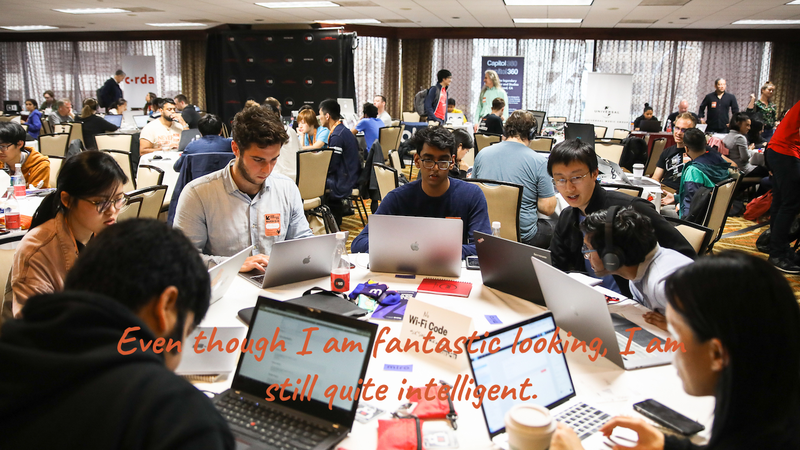

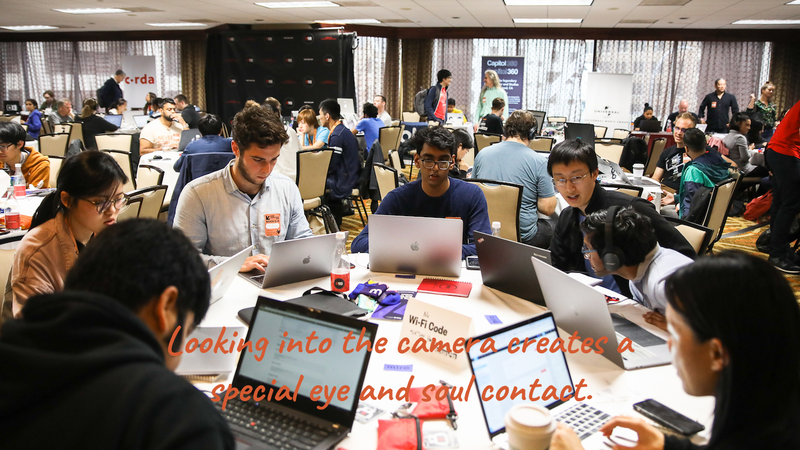

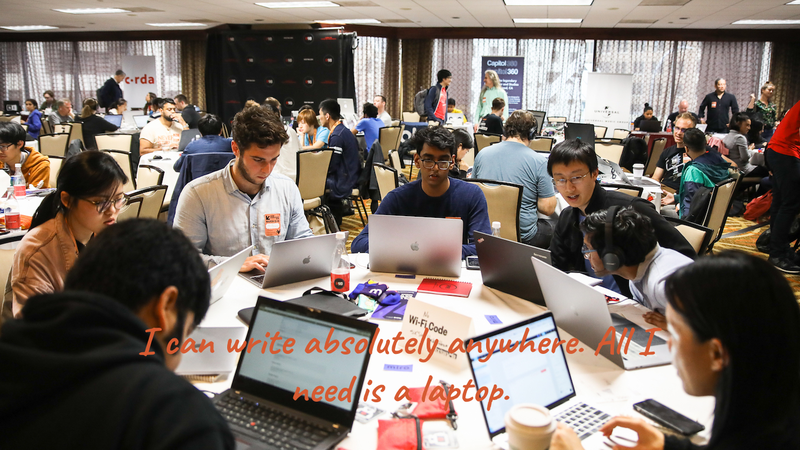

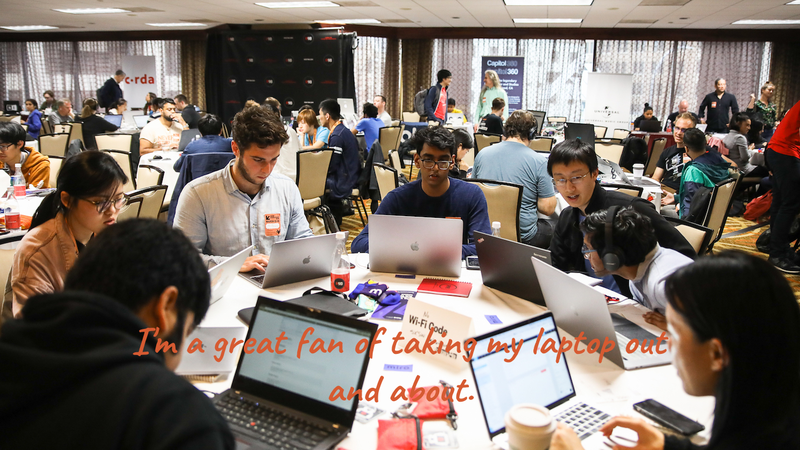

In [592]:
main()